In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('Iowa_Liquor_sales_sample_10pct.csv')

df.head()
#We are going to assume that each row is a transaction between a store and a customer, since the questions are phrased
#that way (not a transaction between State and Store). E.g. State Bottle Cost is the cost for the store to buy the 
#alcohol supply, and State Bottle Retail is the selling price to the final customer. 
#Additionally, we are sticking with the 10% sample data set. 

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [2]:
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

**Question 1**
==

In [3]:
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [4]:
df.shape
#270,955 rows, 18 columns

(270955, 18)

-------------------

In [5]:
df1 = df

In [6]:
def dollars(value):
    return float(value.replace('$',''))
df1['State Bottle Cost'] = df1['State Bottle Cost'].apply(dollars)
df1['State Bottle Retail'] = df1['State Bottle Retail'].apply(dollars)
df1['Sale (Dollars)'] = df1['Sale (Dollars)'].apply(dollars)

In [7]:
df1[['Bottle Volume (ml)','State Bottle Cost', 'State Bottle Retail', 'Bottles Sold', 'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)']].describe()

,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
count,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830
std,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182
min,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000
25%,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000
50%,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000
75%,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000
max,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000


**Question 2**
==

In [8]:
df.isnull().any()
# Null values appear in County Number, County, Category, Category Name

Date                     False
Store Number             False
City                     False
Zip Code                 False
County Number             True
County                    True
Category                  True
Category Name             True
Vendor Number            False
Item Number              False
Item Description         False
Bottle Volume (ml)       False
State Bottle Cost        False
State Bottle Retail      False
Bottles Sold             False
Sale (Dollars)           False
Volume Sold (Liters)     False
Volume Sold (Gallons)    False
dtype: bool

In [9]:
df1[df1['Category Name'].isnull()]
#We test for null Category Names and check the Item Description to see if they have been labelled with a category

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
896,02/05/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
901,02/25/2016,4647,WATERLOO,50707,7.0,Black Hawk,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,24,206.64,4.80,1.27
1514,02/18/2016,2515,MASON CITY,50401,17.0,Cerro Gordo,1082100.0,NaN,420,67487,Grand Marnier Raspberry Peach,750,23.31,34.97,2,69.94,1.50,0.40
1684,02/08/2016,3747,SIGOURNEY,52591,54.0,Keokuk,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,2,56.98,1.50,0.40
2203,02/16/2016,4589,SIBLEY,51249,72.0,Osceola,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,2,44.22,3.50,0.92
2894,02/09/2016,2413,DUBUQUE,52001,31.0,Dubuque,1082100.0,NaN,130,64136,Disaronno Amaretto,750,13.86,20.79,12,249.48,9.00,2.38
3071,02/15/2016,2539,IOWA FALLS,50126,42.0,Hardin,1052100.0,NaN,420,48106,Hennessy Vs Cognac,750,18.99,28.49,3,85.47,2.25,0.59
3482,02/10/2016,3524,AMES,50010,85.0,Story,1032100.0,NaN,115,34821,Svedka Vodka,1750,14.74,22.11,6,132.66,10.50,2.77
4596,02/03/2016,2594,SIOUX CITY,51106,97.0,Woodbury,1052100.0,NaN,420,48099,Hennessy VS,200,5.74,8.61,1,8.61,0.20,0.05
4989,02/23/2016,2620,WINDSOR HEIGHTS,50311,77.0,Polk,1091100.0,NaN,208,27439,Tim Smith's Climax Moonshine,750,17.50,26.25,6,157.50,4.50,1.19


In [10]:
df1[df1['Item Description'] == 'Herradura Gold Reposado 6pak']
#Same Item Description, Item Number, Different Bottles Sold, but Category and Category Name varies from NaN and Tequila
#Will change NULL Category Names to relevant Category names. E.g. In the case below, Category Name will be TEQUILA

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
896,02/05/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
5928,12/10/2015,4829,DES MOINES,50314,77.0,Polk,1022100.0,TEQUILA,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
15970,02/11/2015,2623,SIOUX CITY,51104,97.0,Woodbury,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,1,35.37,0.75,0.20
18404,11/12/2015,4829,DES MOINES,50314,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
28075,12/30/2015,4829,DES MOINES,50314,77.0,Polk,1022100.0,TEQUILA,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
29890,06/30/2015,3986,SIOUX CITY,51101,97.0,Woodbury,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,1,35.37,0.75,0.20
41568,03/02/2015,2633,DES MOINES,50320,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,6,212.22,4.50,1.19
42882,08/27/2015,4604,NEWTON,50208,50.0,Jasper,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,1,35.37,0.75,0.20
55532,02/03/2016,2290,STORM LAKE,50588,11.0,Buena Vista,1022100.0,TEQUILA,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,1,35.37,0.75,0.20
61087,10/21/2015,3762,WINDSOR HEIGHTS,50322,77.0,Polk,1022200.0,NaN,85,3657,Herradura Gold Reposado 6pak,750,23.58,35.37,1,35.37,0.75,0.20


In [11]:
df1.loc[(df1['Item Description'] == 'Herradura Gold Reposado 6pak') & (df1['Category Name'].isnull()), 'Category Name'] = 'TEQUILA'
#Here we replaced the NULL values with TEQUILA

In [12]:
df1[df1['Item Description'] == 'Herradura Gold Reposado 6pak']['Category Name']

896       TEQUILA
5928      TEQUILA
15970     TEQUILA
18404     TEQUILA
28075     TEQUILA
29890     TEQUILA
41568     TEQUILA
42882     TEQUILA
55532     TEQUILA
61087     TEQUILA
72303     TEQUILA
72380     TEQUILA
73530     TEQUILA
74116     TEQUILA
77855     TEQUILA
83521     TEQUILA
87997     TEQUILA
93007     TEQUILA
95308     TEQUILA
99651     TEQUILA
103841    TEQUILA
107969    TEQUILA
110532    TEQUILA
113314    TEQUILA
115345    TEQUILA
115803    TEQUILA
117619    TEQUILA
129949    TEQUILA
131396    TEQUILA
133960    TEQUILA
           ...   
146738    TEQUILA
157679    TEQUILA
166727    TEQUILA
172957    TEQUILA
173042    TEQUILA
173968    TEQUILA
174963    TEQUILA
184962    TEQUILA
185828    TEQUILA
188159    TEQUILA
189360    TEQUILA
189384    TEQUILA
191990    TEQUILA
193290    TEQUILA
195294    TEQUILA
196528    TEQUILA
200351    TEQUILA
201567    TEQUILA
204225    TEQUILA
205124    TEQUILA
211707    TEQUILA
216231    TEQUILA
217198    TEQUILA
223620    TEQUILA
226875    

In [13]:
df1['Category Name'].isnull().sum()
#Checker for remaining NULL Category Name values. Originally had ~500

590

In [14]:
df1.loc[(df1['Item Description'] == 'Hennessy VS') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED GRAPE BRANDIES'

In [15]:
df1.loc[(df1['Item Description'] == 'Svedka Vodka') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED VODKA'

In [16]:
df1.loc[(df1['Item Description'] == 'Grand Marnier Raspberry Peach') & (df1['Category Name'].isnull()), 'Category Name'] = 'MISC. IMPORTED CORDIALS & LIQUEURS'

In [17]:
df1.loc[(df1['Item Description'] == 'Hennessy Vs Cognac') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED GRAPE BRANDIES'

In [18]:
df1.loc[(df1['Item Description'] == 'Disaronno Amaretto') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED AMARETTO'

In [19]:
df1.loc[(df1['Item Description'] == 'Tim Smith\'s Climax Moonshine') & (df1['Category Name'].isnull()), 'Category Name'] = 'DISTILLED SPIRITS SPECIALTY'

In [20]:
df1.loc[(df1['Item Description'] == 'Grand Marnier Cordon Rouge') & (df1['Category Name'].isnull()), 'Category Name'] = 'MISC. IMPORTED CORDIALS & LIQUEURS'

In [21]:
df1.loc[(df1['Item Description'] == 'Stolichnaya Premium Vodka 80 Proof (lv)') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED VODKA'

In [22]:
df1.loc[(df1['Item Description'] == 'Templeton Rye w/Flask') & (df1['Category Name'].isnull()), 'Category Name'] = 'DECANTERS & SPECIALTY PACKAGES'

In [23]:
df1.loc[(df1['Item Description'] == 'Stolichnaya Premium Vodka 80 Prf') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED VODKA'

In [24]:
df1.loc[(df1['Item Description'] == 'Hennessy Black') & (df1['Category Name'].isnull()), 'Category Name'] = 'IMPORTED GRAPE BRANDIES'

In [25]:
df1.loc[(df1['Item Description'] == 'Grey Goose w/2 Martini Glasses') & (df1['Category Name'].isnull()), 'Category Name'] = 'DECANTERS & SPECIALTY PACKAGES'
#Cleaned up Item Descriptions with at least 8 NULL Category Names

In [26]:
df1.loc[df1['County'].isnull()]
#It seems that for every NULL County or County Number, the corresponding column is NULL as well. We can use the
#City to help deduce the County and County Number

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
135,01/20/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1051010.0,AMERICAN GRAPE BRANDIES,115,53214,Paul Masson Grande Amber Brandy,375,3.22,4.83,24,115.92,9.00,2.38
198,03/02/2016,3820,SIOUX CITY,51103,NaN,NaN,1032080.0,IMPORTED VODKA,35,34359,Grey Goose Vodka,200,5.00,7.50,12,90.00,2.40,0.63
272,03/21/2016,4222,EVANSDALE,50707,NaN,NaN,1062300.0,FLAVORED RUM,370,42716,Malibu Coconut Rum,750,7.49,11.24,3,33.72,2.25,0.59
290,03/21/2016,5236,ANAMOSA,52205,NaN,NaN,1081600.0,WHISKEY LIQUEUR,421,64868,Fireball Cinnamon Whiskey,1750,15.33,23.00,6,138.00,10.50,2.77
321,02/23/2016,4203,WAVERLY,50677,NaN,NaN,1051100.0,APRICOT BRANDIES,434,55084,Paramount Blackberry Brandy,375,3.55,5.33,24,127.92,9.00,2.38
863,01/11/2016,2460,HAMPTON,50441,NaN,NaN,1011200.0,STRAIGHT BOURBON WHISKIES,461,77776,Wild Turkey American Honey,750,10.50,15.75,3,47.25,2.25,0.59
964,05/19/2015,4247,BELMOND,50421,NaN,NaN,1012100.0,CANADIAN WHISKIES,55,12408,Canadian Ltd Whisky,1750,9.14,13.71,6,82.26,10.50,2.77
982,03/30/2016,5222,CEDAR RAPIDS,52402,NaN,NaN,1031080.0,VODKA 80 PROOF,300,36904,Mccormick Vodka Pet,375,1.80,2.70,24,64.80,9.00,2.38
1024,03/23/2016,3820,SIOUX CITY,51103,NaN,NaN,1081390.0,IMPORTED SCHNAPPS,421,69637,Dr. Mcgillicuddy's Cherry Schnapps,1000,11.00,16.50,24,396.00,24.00,6.34
1630,02/10/2016,5224,CORALVILLE,52241,NaN,NaN,1062310.0,SPICED RUM,260,43337,Captain Morgan Spiced Rum,1000,11.75,17.63,12,211.56,12.00,3.17


In [27]:
df1.loc[(df1['County'].isnull()), 'City'].value_counts()
# We will attempt to fix Counties with at least 10 NULL entries

BELMOND          153
CEDAR RAPIDS     110
SIOUX CITY        83
CLARINDA          80
DAVENPORT         77
HAMPTON           64
MASON CITY        61
ANAMOSA           49
DUBUQUE           43
CORALVILLE        33
DUNLAP            31
WESLEY            28
CLINTON           27
WAVERLY           23
HARLAN            23
EVANSDALE         23
CRESCO            23
ROCKWELL          17
ACKLEY            14
NORTH LIBERTY     14
WATERLOO          14
DES MOINES        13
SIGOURNEY         11
ALTOONA            9
WEST BRANCH        7
SEYMOUR            6
FORT DODGE         6
LARCHWOOD          6
NORWALK            5
AUDUBON            4
ATLANTIC           4
PLEASANTVILLE      4
OSCEOLA            4
TABOR              3
RUNNELLS           3
CHARITON           2
Name: City, dtype: int64

In [28]:
df1['County'].isnull().sum()
#Checker. Originally had ~1000 NaNs

1077

In [29]:
df1.loc[(df1['City'] == 'BELMOND') & (df1['County'].isnull()), 'County'] = 'Wright'

In [30]:
df1.loc[(df1['City'] == 'BELMOND') & (df1['County'].isnull()), 'County Number'] = 99.0

In [31]:
df1.loc[(df1['City'] == 'CEDAR RAPIDS') & (df1['County'].isnull()), 'County'] = 'Linn'

In [32]:
df1.loc[(df1['City'] == 'CEDAR RAPIDS') & (df1['County'].isnull()), 'County Number'] = 57.0

In [33]:
df1.loc[(df1['City'] == 'SIOUX CITY') & (df1['County'].isnull()), 'County'] = 'Woodbury'

In [34]:
df1.loc[(df1['City'] == 'SIOUX CITY') & (df1['County'].isnull()), 'County Number'] = 97.0

In [36]:
#df1.drop('County Numver', axis = 1, inplace = True)

In [37]:
df1.loc[(df1['City'] == 'CLARINDA') & (df1['County'].isnull()), 'County'] = 'Page'

In [38]:
df1.loc[(df1['City'] == 'CLARINDA') & (df1['County'].isnull()), 'County Number'] = 73.0

In [39]:
df1.loc[(df1['City'] == 'DAVENPORT') & (df1['County'].isnull()), 'County'] = 'Scott'

In [40]:
df1.loc[(df1['City'] == 'DAVENPORT') & (df1['County'].isnull()), 'County Number'] = 82.0

In [41]:
df1.loc[(df1['City'] == 'HAMPTON') & (df1['County'].isnull()), 'County'] = 'Franklin'

In [42]:
df1.loc[(df1['City'] == 'HAMPTON') & (df1['County'].isnull()), 'County Number'] = 35.0

In [43]:
df1.loc[(df1['City'] == 'MASON CITY') & (df1['County'].isnull()), 'County'] = 'Cerro Gordo'

In [44]:
df1.loc[(df1['City'] == 'MASON CITY') & (df1['County'].isnull()), 'County Number'] = 17.0

In [45]:
df1.loc[(df1['City'] == 'ANAMOSA') & (df1['County'].isnull()), 'County'] = 'Jones'

In [46]:
df1.loc[(df1['City'] == 'ANAMOSA') & (df1['County'].isnull()), 'County Number'] = 53.0

In [47]:
df1.loc[(df1['City'] == 'DUBUQUE') & (df1['County'].isnull()), 'County'] = 'Dubuque'

In [48]:
df1.loc[(df1['City'] == 'DUBUQUE') & (df1['County'].isnull()), 'County Number'] = 31.0

In [49]:
df1.loc[(df1['City'] == 'CORALVILLE') & (df1['County'].isnull()), 'County'] = 'Johnson'

In [50]:
df1.loc[(df1['City'] == 'CORALVILLE') & (df1['County'].isnull()), 'County Number'] = 52.0

In [51]:
df1.loc[(df1['City'] == 'DUNLAP') & (df1['County'].isnull()), 'County'] = 'Harrison'

In [52]:
df1.loc[(df1['City'] == 'DUNLAP') & (df1['County'].isnull()), 'County Number'] = 43.0

In [53]:
df1.loc[(df1['City'] == 'WESLEY') & (df1['County'].isnull()), 'County'] = 'Kossuth'

In [54]:
df1.loc[(df1['City'] == 'WESLEY') & (df1['County'].isnull()), 'County Number'] = 55.0

In [55]:
df1.loc[(df1['City'] == 'CLINTON') & (df1['County'].isnull()), 'County'] = 'Clinton'

In [56]:
df1.loc[(df1['City'] == 'CLINTON') & (df1['County'].isnull()), 'County Number'] = 23.0

In [57]:
df1.loc[(df1['City'] == 'HARLAN') & (df1['County'].isnull()), 'County'] = 'Shelby'

In [58]:
df1.loc[(df1['City'] == 'HARLAN') & (df1['County'].isnull()), 'County Number'] = 83.0

In [59]:
df1.loc[(df1['City'] == 'WAVERLY') & (df1['County'].isnull()), 'County'] = 'Bremer'

In [60]:
df1.loc[(df1['City'] == 'WAVERLY') & (df1['County'].isnull()), 'County Number'] = 9.0

In [61]:
df1.loc[(df1['City'] == 'EVANSDALE') & (df1['County'].isnull()), 'County'] = 'Black Hawk'

In [62]:
df1.loc[(df1['City'] == 'EVANSDALE') & (df1['County'].isnull()), 'County Number'] = 7.0

In [63]:
df1.loc[(df1['City'] == 'CRESCO') & (df1['County'].isnull()), 'County'] = 'Howard'

In [64]:
df1.loc[(df1['City'] == 'CRESCO') & (df1['County'].isnull()), 'County Number'] = 45.0

In [65]:
df1.loc[(df1['City'] == 'ROCKWELL') & (df1['County'].isnull()), 'County'] = 'Cerro Gordo'

In [66]:
df1.loc[(df1['City'] == 'ROCKWELL') & (df1['County'].isnull()), 'County Number'] = 17.0

In [67]:
df1.loc[(df1['City'] == 'WATERLOO') & (df1['County'].isnull()), 'County'] = 'Black Hawk'

In [68]:
df1.loc[(df1['City'] == 'WATERLOO') & (df1['County'].isnull()), 'County Number'] = 7.0

In [69]:
df1.loc[(df1['City'] == 'NORTH LIBERTY') & (df1['County'].isnull()), 'County'] = 'Johnson'

In [70]:
df1.loc[(df1['City'] == 'NORTH LIBERTY') & (df1['County'].isnull()), 'County Number'] = 52.0

In [71]:
df1.loc[(df1['City'] == 'ACKLEY') & (df1['County'].isnull()), 'County'] = 'Hardin'
# Ackley has Counties of Hardin and Webster, but since Hardin outnumbers Webster 57-34, we use Hardin for the 14 NaNs

In [72]:
df1.loc[(df1['City'] == 'ACKLEY') & (df1['County'].isnull()), 'County Number'] = 42.0

In [73]:
df1.loc[(df1['City'] == 'DES MOINES') & (df1['County'].isnull()), 'County'] = 'Polk'

In [74]:
df1.loc[(df1['City'] == 'DES MOINES') & (df1['County'].isnull()), 'County Number'] = 77.0

In [75]:
df1.loc[(df1['City'] == 'SIGOURNEY') & (df1['County'].isnull()), 'County'] = 'Keokuk'

In [76]:
df1.loc[(df1['City'] == 'SIGOURNEY') & (df1['County'].isnull()), 'County Number'] = 54.0

*Missing data was apparent in the County Number, County, Category Number, and Category columns. There doesn't seem to be a specific pattern, but it can be due to the fact that the same Item Description covers more than one variation (e.g. Bottle Size, Number of Bottles Sold) and the unique identifiers of categories and counties only match a certain specification of the Item Description.*

------------------

**Question 3 and 4**
===

In [77]:
datelist = df1['Date'].str.split('/')
df1['Year'] = [x[2] for x in datelist]
df1['Year'].value_counts()
#Split the year out of the 'Date' column and create a new column just with the year

2015    218594
2016     52361
Name: Year, dtype: int64

In [78]:
store_2015 = df1.loc[df1['Year'] == '2015', 'Store Number']
store_2016 = df1.loc[df1['Year'] == '2016', 'Store Number']
def finder(ser1, ser2):
    new_stores = []
    for x in ser2:
        if x not in ser1:
            new_stores.append(x)
    return new_stores
new_stores = finder(store_2015,store_2016)
len(set(new_stores))


249

In [79]:
#We see that there were 249 new stores in 2016, so we can say that those 249 stores were not opened in 2015. 
#We print out 10 of the stores 
unopened_stores = list(set(new_stores))
print unopened_stores[:10]

[5124, 5125, 3592, 4617, 4107, 5132, 2573, 5134, 4184, 4627]


In [80]:
pt = pd.pivot_table(df1[df1['Year'] =='2015'], index = 'Store Number', values = ['Sale (Dollars)'], aggfunc = np.sum)
pt.sort_values(by = ['Sale (Dollars)'], ascending = False, inplace = True)
pt
#We see the store 2633 has the highest total amount of sales in 2015

,Sale (Dollars)
Store Number,
2633,1000783.30
4829,878812.70
3385,441983.55
2512,419746.83
3420,352020.66
3952,333311.98
3814,247417.42
3354,240365.94
3773,232460.41


In [81]:
df1['Cost'] = df1['State Bottle Cost'] * df1['Bottles Sold']
df1['Profit'] = df1['Sale (Dollars)'] - (df1['State Bottle Cost'] * df1['Bottles Sold'])
df1.head()
#Created Cost (Bottles Sold * State Bottle Cost) and Profit (Sale (Dollars) - Cost) columns

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Cost,Profit
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,2015,54.00,27.00
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,2016,27.50,13.76
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,2016,302.16,151.20
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,2016,57.00,28.50
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,2015,86.40,43.20


In [82]:
gb = df1[df1['Year'] == '2015'].groupby(['Store Number'])['Profit'].agg({'Profit': np.sum})
gb.sort_values(by=(['Profit']), ascending = False, inplace = True)
gb
#Store profits in 2015 sorted from largest to smallest

,Profit
Store Number,
2633,333816.91
4829,293196.99
3385,147884.62
2512,140143.46
3420,117593.34
3952,111230.21
3814,83004.48
3354,80244.69
3773,77525.08


**Question 5**
==

In [83]:
df1['Category Name'].unique()
#Looking at all the possible categories

array(['APRICOT BRANDIES', 'BLENDED WHISKIES', 'STRAIGHT BOURBON WHISKIES',
       'AMERICAN COCKTAILS', 'VODKA 80 PROOF', 'AMERICAN DRY GINS',
       'AMERICAN GRAPE BRANDIES', 'CANADIAN WHISKIES', 'IMPORTED VODKA',
       'CINNAMON SCHNAPPS', 'SINGLE BARREL BOURBON WHISKIES',
       'PEPPERMINT SCHNAPPS', 'VODKA FLAVORED', '100 PROOF VODKA',
       'DISTILLED SPIRITS SPECIALTY', 'TEQUILA', 'TENNESSEE WHISKIES',
       'WHISKEY LIQUEUR', 'MISC. AMERICAN CORDIALS & LIQUEURS',
       'APPLE SCHNAPPS', 'CHERRY BRANDIES',
       'MISC. IMPORTED CORDIALS & LIQUEURS', 'IMPORTED DRY GINS',
       'WATERMELON SCHNAPPS', 'BLACKBERRY BRANDIES', 'SINGLE MALT SCOTCH',
       'PUERTO RICO & VIRGIN ISLANDS RUM', 'SPICED RUM', 'CREAM LIQUEURS',
       'SCOTCH WHISKIES', 'IMPORTED VODKA - MISC', 'IRISH WHISKIES',
       'FLAVORED RUM', 'IMPORTED GRAPE BRANDIES', 'SPEARMINT SCHNAPPS',
       'RASPBERRY SCHNAPPS', 'TRIPLE SEC', 'AMERICAN AMARETTO',
       'IMPORTED SCHNAPPS', 'STRAIGHT RYE WHISKIES', '

In [84]:
df1.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost        float64
State Bottle Retail      float64
Bottles Sold               int64
Sale (Dollars)           float64
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
Year                      object
Cost                     float64
Profit                   float64
dtype: object

In [85]:
def cats(row):
    if row is np.nan:
        pass
    elif 'BRANDIES' in row:
        row = 'BRANDY'
    elif 'LIQUEUR' in row or 'ANISETTE' in row or 'AMARETTO' in row:
        row = 'LIQUEUR'
    elif 'WHISKIES' in row or 'SCOTCH' in row or 'WHISKY' in row:
        row = 'WHISKY'
    elif 'VODKA' in row:
        row = 'VODKA'
    elif 'SCHNAPPS' in row:
        row = 'SCHNAPPS'
    elif 'TEQUILA' in row:
        row = 'TEQUILA'
    elif 'RUM' in row:
        row = 'RUM'
    elif 'CREME' in row:
        row = 'CREME'
    elif 'GIN' in row:
        row = 'GIN'
    else:
        row = 'OTHER'
    return row
    

df1['Broad Category'] = df1['Category Name'].apply(cats)
df1.head(20)
#Classifying Category Names to broader categories

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Cost,Profit,Broad Category
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,4.50,6.75,12,81.00,9.00,2.38,2015,54.00,27.00,BRANDY
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,13.75,20.63,2,41.26,1.50,0.40,2016,27.50,13.76,WHISKY
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,12.59,18.89,24,453.36,24.00,6.34,2016,302.16,151.20,WHISKY
3,02/03/2016,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,9.50,14.25,6,85.50,10.50,2.77,2016,57.00,28.50,OTHER
4,08/18/2015,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,7.20,10.80,12,129.60,21.00,5.55,2015,86.40,43.20,VODKA
5,04/20/2015,2569,CEDAR RAPIDS,52402,57.0,Linn,1041100.0,AMERICAN DRY GINS,205,31473,...,13.32,19.98,6,119.88,10.50,2.77,2015,79.92,39.96,GIN
6,08/05/2015,2596,OTTUMWA,52501,90.0,Wapello,1051010.0,AMERICAN GRAPE BRANDIES,85,52806,...,6.66,9.99,3,29.97,2.25,0.59,2015,19.98,9.99,BRANDY
7,06/25/2015,3456,CLEAR LAKE,50428,17.0,Cerro Gordo,1012100.0,CANADIAN WHISKIES,65,10628,...,15.75,23.63,2,47.26,3.50,0.92,2015,31.50,15.76,WHISKY
8,01/04/2016,4757,BONDURANT,50035,77.0,Polk,1032080.0,IMPORTED VODKA,370,34006,...,11.49,17.24,4,68.96,3.00,0.79,2016,45.96,23.00,VODKA
9,11/10/2015,4346,SHELLSBURG,52332,6.0,Benton,1081315.0,CINNAMON SCHNAPPS,65,82610,...,7.62,11.43,2,22.86,2.00,0.53,2015,15.24,7.62,SCHNAPPS


In [86]:
df1['Broad Category'].value_counts()
#Number of transactions per Broad Category

WHISKY      74150
VODKA       70040
RUM         32753
LIQUEUR     30510
BRANDY      15255
SCHNAPPS    13667
TEQUILA     12151
OTHER       11587
GIN          9917
CREME         730
Name: Broad Category, dtype: int64

In [87]:
df1.loc[df1['Broad Category'] == 'WHISKY','Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Whisky'

CANADIAN WHISKIES                 27087
STRAIGHT BOURBON WHISKIES         15342
BLENDED WHISKIES                  11547
TENNESSEE WHISKIES                 7081
SCOTCH WHISKIES                    5375
IRISH WHISKIES                     2791
SINGLE MALT SCOTCH                 2288
STRAIGHT RYE WHISKIES              1388
BUTTERSCOTCH SCHNAPPS               897
SINGLE BARREL BOURBON WHISKIES      319
JAPANESE WHISKY                      23
CORN WHISKIES                        12
Name: Category Name, dtype: int64

In [88]:
df1.loc[df1['Broad Category'] == 'VODKA', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Vodka'

VODKA 80 PROOF           35373
VODKA FLAVORED           14001
IMPORTED VODKA           10763
IMPORTED VODKA - MISC     6506
100 PROOF VODKA           3304
OTHER PROOF VODKA           78
LOW PROOF VODKA             15
Name: Category Name, dtype: int64

In [89]:
df1.loc[df1['Broad Category'] == 'RUM', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Rum'

SPICED RUM                          14631
PUERTO RICO & VIRGIN ISLANDS RUM    10062
FLAVORED RUM                         7282
BARBADOS RUM                          393
JAMAICA RUM                           385
Name: Category Name, dtype: int64

In [90]:
df1.loc[df1['Broad Category'] == 'LIQUEUR', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Liqueur'

WHISKEY LIQUEUR                       10902
MISC. IMPORTED CORDIALS & LIQUEURS     6328
CREAM LIQUEURS                         6284
MISC. AMERICAN CORDIALS & LIQUEURS     3394
COFFEE LIQUEURS                        1914
AMERICAN AMARETTO                      1346
IMPORTED AMARETTO                       304
ANISETTE                                 35
AMARETTO - IMPORTED                       3
Name: Category Name, dtype: int64

In [91]:
df1.loc[df1['Broad Category'] == 'BRANDY', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Brandy'

AMERICAN GRAPE BRANDIES    6589
IMPORTED GRAPE BRANDIES    4825
BLACKBERRY BRANDIES        1580
APRICOT BRANDIES           1109
PEACH BRANDIES              678
CHERRY BRANDIES             330
MISCELLANEOUS  BRANDIES     144
Name: Category Name, dtype: int64

In [92]:
df1.loc[df1['Broad Category'] == 'SCHNAPPS', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Schnapps'

IMPORTED SCHNAPPS          4249
PEPPERMINT SCHNAPPS        3221
PEACH SCHNAPPS             1650
MISCELLANEOUS SCHNAPPS      968
APPLE SCHNAPPS              774
CINNAMON SCHNAPPS           729
WATERMELON SCHNAPPS         479
GRAPE SCHNAPPS              333
ROOT BEER SCHNAPPS          324
RASPBERRY SCHNAPPS          304
STRAWBERRY SCHNAPPS         302
TROPICAL FRUIT SCHNAPPS     235
SPEARMINT SCHNAPPS           99
Name: Category Name, dtype: int64

In [93]:
df1.loc[df1['Broad Category'] == 'TEQUILA', 'Item Description'].value_counts() 
#Tequila only has one category name so we look at the different items instead

Jose Cuervo Especial Reposado Tequila         2205
Patron Tequila Silver                          772
Patron Silver Tequila                          652
Jose Cuervo Especial Silver                    618
Juarez Tequila Gold                            614
Jose Cuervo Especial Reposado Tequila Mini     405
1800 Silver Tequila                            377
Juarez Tequila Silver                          365
Jose Cuervo Especial Reposado Flask            344
Tortilla White Tequila                         291
Jose Cuervo Especial Reposado Square           289
Sauza Gold                                     248
1800 Reposado Tequila                          229
El Jimador Reposado Tequila                    225
Hornitos Gold                                  199
Patron Tequila Silver Mini                     169
Margaritaville Gold Tequila                    159
Familia Camarena Silver                        158
Familia Camarena Reposado                      152
Sauza Blanco Silver            

In [94]:
df1.loc[df1['Broad Category'] == 'OTHER', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Other'

AMERICAN COCKTAILS                6929
DISTILLED SPIRITS SPECIALTY       1394
TRIPLE SEC                        1236
DECANTERS & SPECIALTY PACKAGES    1177
AMERICAN ALCOHOL                   573
BOTTLED IN BOND BOURBON            190
ROCK & RYE                          86
HIGH PROOF BEER - AMERICAN           2
Name: Category Name, dtype: int64

In [95]:
df1.loc[df1['Broad Category'] == 'GIN', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Gin'

AMERICAN DRY GINS     6559
IMPORTED DRY GINS     2939
FLAVORED GINS          250
AMERICAN SLOE GINS     169
Name: Category Name, dtype: int64

In [96]:
df1.loc[df1['Broad Category'] == 'CREME', 'Category Name'].value_counts()
#Number of liquors and transactions of each liquor in broader category 'Creme'

GREEN CREME DE MENTHE    259
WHITE CREME DE CACAO     201
DARK CREME DE CACAO      157
WHITE CREME DE MENTHE     61
CREME DE ALMOND           52
Name: Category Name, dtype: int64

In [97]:
pt5 = pd.pivot_table(df1, index = ['Broad Category'], values = ['Bottles Sold'], aggfunc = np.sum)
pt5.sort_values(by=(['Bottles Sold']), ascending = False, inplace = True)
pt5
#Category with the highest number of bottles sold is Vodka. 

,Bottles Sold
Broad Category,
VODKA,801404
WHISKY,697731
RUM,330118
LIQUEUR,270479
BRANDY,152143
OTHER,114475
TEQUILA,113680
SCHNAPPS,104158
GIN,85182


In [98]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pt5a = pd.pivot_table(df1, index = ['Broad Category'], values = ['Profit'], aggfunc = np.sum)
pt5a.sort_values(by=(['Profit']), ascending = False, inplace = True)
pt5a
#Category with the highest profits is Whisky. 

,Profit
Broad Category,
WHISKY,3686320.60
VODKA,2803675.52
RUM,1525286.20
LIQUEUR,1377699.04
TEQUILA,634040.03
BRANDY,502080.60
OTHER,419543.28
SCHNAPPS,404583.55
GIN,306502.72


-------

**Question 6**
===

In [99]:
pt6 = pd.pivot_table(df1, index = ['Broad Category', 'Category Name'], values = ['State Bottle Retail', 'Volume Sold (Liters)'], 
                    aggfunc = [np.mean, np.max, np.min, np.sum])
pt6
#The only issue with this table is that the sum of the price per bottle sold doesn't tell us any relevant information
#as it does not consider the number of bottles sold in the transactions. 

mean  \
                                                  State Bottle Retail   
Broad Category Category Name                                            
BRANDY         AMERICAN GRAPE BRANDIES                           8.16   
               APRICOT BRANDIES                                  7.96   
               BLACKBERRY BRANDIES                               9.21   
               CHERRY BRANDIES                                   8.02   
               IMPORTED GRAPE BRANDIES                          21.30   
               MISCELLANEOUS  BRANDIES                          17.38   
               PEACH BRANDIES                                    7.34   
CREME          CREME DE ALMOND                                   6.85   
               DARK CREME DE CACAO                               7.09   
               GREEN CREME DE MENTHE                             7.04   
               WHITE CREME DE CACAO                              7.03   
               WHITE CREME DE MENTHE                             7.13   
GIN            AMERICAN DRY GINS                                 8.86   
               AMERICAN SLOE GINS                                7.53   
               FLAVORED GINS                                    10.83   
               IMPORTED DRY GINS                                22.74   
LIQUEUR        AMARETTO - IMPORTED                              46.70   
               AMERICAN AMARETTO                                 6.80   
               ANISETTE                                          7.11   
               COFFEE LIQUEURS                                  15.98   
               CREAM LIQUEURS                                   17.93   
               IMPORTED AMARETTO                                19.95   
               MISC. AMERICAN CORDIALS & LIQUEURS               12.30   
               MISC. IMPORTED CORDIALS & LIQUEURS               21.31   
               WHISKEY LIQUEUR                                  17.76   
OTHER          AMERICAN ALCOHOL                                 13.29   
               AMERICAN COCKTAILS                               10.81   
               BOTTLED IN BOND BOURBON                          28.86   
               DECANTERS & SPECIALTY PACKAGES                   21.48   
               DISTILLED SPIRITS SPECIALTY                      15.22   
...                                                               ...   
SCHNAPPS       IMPORTED SCHNAPPS                                16.21   
               MISCELLANEOUS SCHNAPPS                           10.29   
               PEACH SCHNAPPS                                    9.76   
               PEPPERMINT SCHNAPPS                               7.50   
               RASPBERRY SCHNAPPS                                8.57   
               ROOT BEER SCHNAPPS                                9.39   
               SPEARMINT SCHNAPPS                                7.50   
               STRAWBERRY SCHNAPPS                               8.27   
               TROPICAL FRUIT SCHNAPPS                           7.51   
               WATERMELON SCHNAPPS                              10.69   
TEQUILA        TEQUILA                                          20.64   
VODKA          100 PROOF VODKA                                   8.76   
               IMPORTED VODKA                                   20.17   
               IMPORTED VODKA - MISC                            17.30   
               LOW PROOF VODKA                                  15.74   
               OTHER PROOF VODKA                                11.84   
               VODKA 80 PROOF                                    9.45   
               VODKA FLAVORED                                   10.73   
WHISKY         BLENDED WHISKIES                                 10.23   
               BUTTERSCOTCH SCHNAPPS                             9.46   
               CANADIAN WHISKIES                                14.26   
               CORN WHISKIES                      

In [100]:
pt6a = pd.pivot_table(df1, index = ['Broad Category', 'Category Name'], values = ['Sale (Dollars)'], aggfunc = np.sum)
pt6a.sort_values(by=(['Sale (Dollars)']), ascending = False, inplace = True)
pt6a
#Here is a table of the total sales of each category, taking into account the price and number of bottles as well

,,Sale (Dollars)
Broad Category,Category Name,
WHISKY,CANADIAN WHISKIES,4408768.86
VODKA,VODKA 80 PROOF,4208811.41
RUM,SPICED RUM,2727704.47
VODKA,IMPORTED VODKA,2105495.60
WHISKY,STRAIGHT BOURBON WHISKIES,1923907.85
TEQUILA,TEQUILA,1900164.78
LIQUEUR,WHISKEY LIQUEUR,1797053.44
WHISKY,TENNESSEE WHISKIES,1598605.37
RUM,PUERTO RICO & VIRGIN ISLANDS RUM,1046370.81


-----

**Question 7**
==

In [101]:
gb7 = df1.groupby(['County','Broad Category'])['Broad Category'].count()
gb7
#Shows amount of transactions per Broad Category for each county

County     Broad Category
Adair      BRANDY              27
           CREME                1
           GIN                 14
           LIQUEUR             53
           OTHER               24
           RUM                 65
           SCHNAPPS            29
           TEQUILA             35
           VODKA              158
           WHISKY             179
Adams      BRANDY              11
           CREME                3
           GIN                  4
           LIQUEUR             41
           OTHER               10
           RUM                 22
           SCHNAPPS            14
           TEQUILA              6
           VODKA               35
           WHISKY              88
Allamakee  BRANDY              54
           CREME                8
           GIN                 26
           LIQUEUR            154
           OTHER               32
           RUM                126
           SCHNAPPS            77
           TEQUILA             34
           VODKA      

In [102]:
gb7a = df1.groupby(['County','Broad Category'])['Broad Category'].count()
gb7a.sort_values(axis = 0, ascending = False, inplace = True)
gb7a
#Ranks the number of transactions of a Broad Category per County

County         Broad Category
Polk           VODKA             14209
               WHISKY            12688
Linn           VODKA              6675
               WHISKY             5825
Polk           RUM                5580
               LIQUEUR            5509
Scott          VODKA              4655
               WHISKY             4087
Black Hawk     VODKA              3947
Johnson        VODKA              3743
Black Hawk     WHISKY             3727
Johnson        WHISKY             3435
Polk           BRANDY             3038
Linn           RUM                2787
Pottawattamie  WHISKY             2569
Polk           TEQUILA            2529
Story          WHISKY             2478
Linn           LIQUEUR            2460
Story          VODKA              2320
Pottawattamie  VODKA              2245
Woodbury       WHISKY             2229
               VODKA              2224
Dubuque        VODKA              2155
               WHISKY             2004
Polk           OTHER              

----

**Question 8**
==

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

county = pd.read_csv('IowaCounties.csv')
county.head()
#Imported CSV that shows population of each county (provided by GA PostgreSQL server)

,county,population
0,Adair,7682
1,Adams,4029
2,Allamakee,14330
3,Appanoose,12884
4,Audubon,6119


In [104]:
county.describe()

,population
count,99.00
mean,30771.23
std,52888.74
min,4029.00
25%,10430.50
50%,15679.00
75%,24631.00
max,430640.00


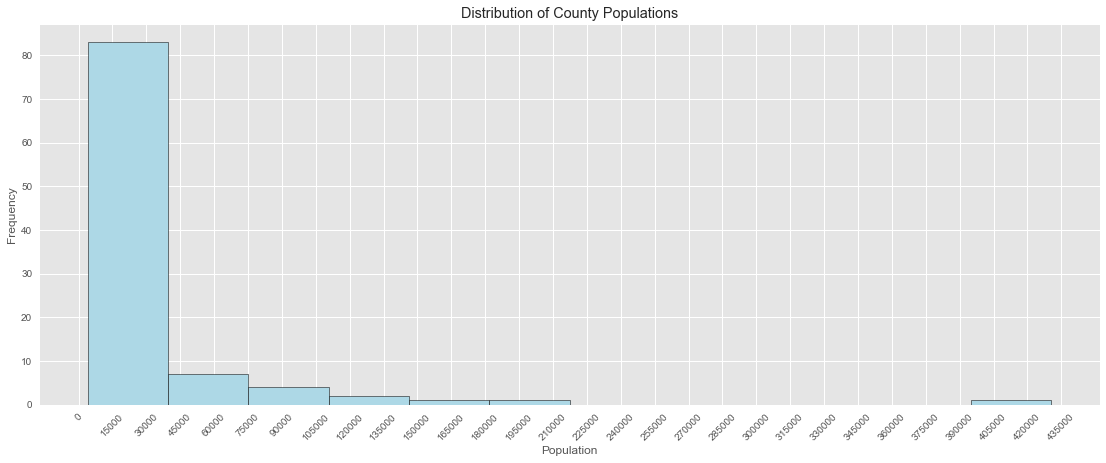

In [105]:
plt.figure(figsize = (19, 7))
plt.hist(county['population'], 12, edgecolor = 'black', color = 'lightblue')
plt.title('Distribution of County Populations')
plt.ylabel('Frequency')
plt.xlabel('Population')
plt.xticks(range(0,450000,15000), rotation = 45)
plt.show()
#From looking at the histogram and the mean above, 31,000 seems like a good cutoff point for large and small 
#populations

In [106]:
county['popsize'] = county['population'].apply(lambda x: 'Large' if x > 31000 else 'Small')

In [107]:
county.head()

,county,population,popsize
0,Adair,7682,Small
1,Adams,4029,Small
2,Allamakee,14330,Small
3,Appanoose,12884,Small
4,Audubon,6119,Small


In [108]:
df2 = pd.merge(df1,county, left_on = ['County'], right_on = ['county'], how = 'left')
#Merging original dataframe with county dataframe using the county name as keys. 

In [109]:
df2.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Cost,Profit,Broad Category,county,population,popsize
0,11/04/2015,3717,SUMNER,50674,9.00,Bremer,1051100.00,APRICOT BRANDIES,55,54436,...,81.00,9.00,2.38,2015,54.00,27.00,BRANDY,Bremer,24276.00,Small
1,03/02/2016,2614,DAVENPORT,52807,82.00,Scott,1011100.00,BLENDED WHISKIES,395,27605,...,41.26,1.50,0.40,2016,27.50,13.76,WHISKY,Scott,165224.00,Large
2,02/11/2016,2106,CEDAR FALLS,50613,7.00,Black Hawk,1011200.00,STRAIGHT BOURBON WHISKIES,65,19067,...,453.36,24.00,6.34,2016,302.16,151.20,WHISKY,Black Hawk,131090.00,Large
3,02/03/2016,2501,AMES,50010,85.00,Story,1071100.00,AMERICAN COCKTAILS,395,59154,...,85.50,10.50,2.77,2016,57.00,28.50,OTHER,Story,89542.00,Large
4,08/18/2015,3654,BELMOND,50421,99.00,Wright,1031080.00,VODKA 80 PROOF,297,35918,...,129.60,21.00,5.55,2015,86.40,43.20,VODKA,Wright,13229.00,Small


In [110]:
df2.groupby('popsize')['Store Number'].agg({'unique': pd.Series.nunique})
#It appears that counties with larger populations have a higher amount of stores than counties with smaller populations

,unique
popsize,
Large,894
Small,497


In [111]:
pt8 = pd.pivot_table(df2, index = ['popsize'], values = ['Bottles Sold'])
pt8
#The average number of bottles sold is higher for counties with larger populations than counties with smaller populations

,Bottles Sold
popsize,
Large,10.72
Small,7.67


In [112]:
df2.groupby('popsize')['Broad Category'].value_counts()


popsize  Broad Category
Large    VODKA             52820
         WHISKY            51056
         RUM               22946
         LIQUEUR           21682
         BRANDY            12076
         TEQUILA            9350
         SCHNAPPS           8882
         OTHER              8258
         GIN                7757
         CREME               451
Small    WHISKY            23064
         VODKA             17212
         RUM                9796
         LIQUEUR            8823
         SCHNAPPS           4782
         OTHER              3329
         BRANDY             3178
         TEQUILA            2798
         GIN                2158
         CREME               279
Name: Broad Category, dtype: int64

***Overall, the Large and Small counties share a somewhat similar taste. Both counties prefer Vodkas and Whiskies by far, but Large counties have a slight preference for Vodka and Small counties have Whisky as their most preferred drink. Rum and Liqueurs are the next preferred drinks for both counties. Large counties then prefer Brandy and Tequila, whereas Small counties prefer Schnapps and Other categories. Gin and Creme both round out the bottom of the preferences of Large and Small counties.***

---

**Question 9**
==

In [113]:
#We want to plot the information above in Question 8 and visualize the preferences of Large and Small counties
#by using the number of transactions of each Broad Category.  
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
plt.style.use('ggplot')

df3 = df2



In [130]:
values = df3.groupby('popsize')['Broad Category'].value_counts()
print values
large_values = values['Large']
small_values = values['Small']
large_index = range(len(large_values))
small_index = range(len(small_values))

popsize  Broad Category
Large    VODKA             52820
         WHISKY            51056
         RUM               22946
         LIQUEUR           21682
         BRANDY            12076
         TEQUILA            9350
         SCHNAPPS           8882
         OTHER              8258
         GIN                7757
         CREME               451
Small    WHISKY            23064
         VODKA             17212
         RUM                9796
         LIQUEUR            8823
         SCHNAPPS           4782
         OTHER              3329
         BRANDY             3178
         TEQUILA            2798
         GIN                2158
         CREME               279
Name: Broad Category, dtype: int64


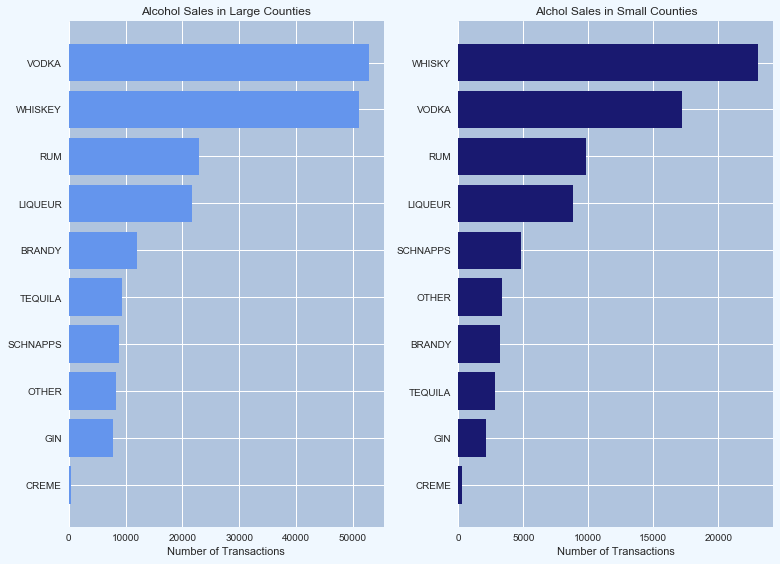

In [115]:
sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'aliceblue'})
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (11,8))
ax.invert_yaxis()
ax.barh(large_index, large_values, color = 'cornflowerblue')
ax.set_yticks(large_index)
ax.set_title('Alcohol Sales in Large Counties')
ax.set_yticklabels(['VODKA','WHISKEY','RUM','LIQUEUR','BRANDY','TEQUILA','SCHNAPPS','OTHER','GIN','CREME'])
ax.set_xlabel('Number of Transactions')
ax1.invert_yaxis()
ax1.barh(small_index, small_values, color = 'midnightblue')
ax1.set_yticks(small_index)
ax1.set_title('Alchol Sales in Small Counties')
ax1.set_yticklabels(['WHISKY','VODKA','RUM','LIQUEUR','SCHNAPPS','OTHER','BRANDY','TEQUILA','GIN','CREME'])
ax1.set_xlabel('Number of Transactions')
plt.tight_layout()
plt.show()

**Executive Summary**
==

In [116]:
#Analysis of West, Central, East Iowa
#Counties with transactions above 5,000
#Counties West:(6)Pottawattamie/(8)Woodbury, Central:(1)Polk/(7)Story, East:(2)Linn/(3)Scott/(5)johnson/(9)Dubuque
#NE:(4)blackhawk North:(10)Cerro Gordo

**Objective:**

We want to explore the alcohol sales trends in counties across Iowa, and see if the geographical location of each county produces different sales levels and alcohol preferences. 

In order to analyze these trends with better accuracy, we will only look at the counties that have at least 5,000 transactions in the dataset.

In [117]:
results = df2.loc[df2['County'].notnull(), 'County'].value_counts()
results[:10]

Polk             49115
Linn             23621
Scott            16755
Black Hawk       15120
Johnson          13236
Pottawattamie     9111
Story             8959
Woodbury          8645
Dubuque           7800
Cerro Gordo       6452
Name: County, dtype: int64

In [118]:
clist = ['Polk', 'Linn','Scott','Black Hawk','Johnson','Pottawattamie','Story','Woodbury','Dubuque','Cerro Gordo']
es = df1.loc[df1['County'].isin(clist)]
es['County'].value_counts()
#We make a new dataframe that only has rows in our desired counties

Polk             49115
Linn             23621
Scott            16755
Black Hawk       15120
Johnson          13236
Pottawattamie     9111
Story             8959
Woodbury          8645
Dubuque           7800
Cerro Gordo       6452
Name: County, dtype: int64

In [119]:
print es.shape[0]/float(df1.shape[0])
#These top 10 counties cover ~60% of all transactions

0.586126847632


<h1 align='center'>Central Region</h1>

![Polk](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Map_of_Iowa_highlighting_Polk_County.svg/200px-Map_of_Iowa_highlighting_Polk_County.svg.png "Polk County")

<h3 align="center">Polk County</h3> 


![Story County](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Map_of_Iowa_highlighting_Story_County.svg/200px-Map_of_Iowa_highlighting_Story_County.svg.png "Story County")

<h3 align='center'>Story County</h3>

<h1 align='center'>Eastern Region</h1>

![Linn County](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/Map_of_Iowa_highlighting_Linn_County.svg/200px-Map_of_Iowa_highlighting_Linn_County.svg.png "Linn County")

<h3 align='center'>Linn County</h3>

![Scott County](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Map_of_Iowa_highlighting_Scott_County.svg/200px-Map_of_Iowa_highlighting_Scott_County.svg.png "Scott County")

<h3 align='center'>Scott County</h3>

![Johnson County](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9e/Map_of_Iowa_highlighting_Johnson_County.svg/200px-Map_of_Iowa_highlighting_Johnson_County.svg.png "Johnson County")

<h3 align='center'>Johnson County</h3>

![Dubuque County](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Map_of_Iowa_highlighting_Dubuque_County.svg/200px-Map_of_Iowa_highlighting_Dubuque_County.svg.png "Dubuque County")

<h3 align='center'>Dubuque County</h3>

<h1 align='center'>North Eastern Region</h1>

![Black Hawk County](https://upload.wikimedia.org/wikipedia/commons/thumb/1/14/Map_of_Iowa_highlighting_Black_Hawk_County.svg/200px-Map_of_Iowa_highlighting_Black_Hawk_County.svg.png "Black Hawk County")

<h3 align='center'>Black Hawk County</h3>

<h1 align='center'>Northern Region</h1>

![Cerro Gordo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Map_of_Iowa_highlighting_Cerro_Gordo_County.svg/200px-Map_of_Iowa_highlighting_Cerro_Gordo_County.svg.png "Cerro Gordo County")

<h3 align='center'>Cerro Gordo County</h3>

<h1 align='center'>Western Region</h1>

![Pottawattamie County](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Map_of_Iowa_highlighting_Pottawattamie_County.svg/200px-Map_of_Iowa_highlighting_Pottawattamie_County.svg.png "Pottawattamie County")

<h3 align='center'>Pottawattamie County</h3>

![Woodbury County ](https://upload.wikimedia.org/wikipedia/commons/thumb/d/df/Map_of_Iowa_highlighting_Woodbury_County.svg/200px-Map_of_Iowa_highlighting_Woodbury_County.svg.png "Woodbury County")

<h3 align='center'>Woodbury County</h3>

In [120]:
#We will add a new column that indicates the location of the county (North/Central/West/East/NorthEast)
def locate(values):
    if 'Polk' in values['County'] or 'Story' in values['County']:
        return 'Central'
    elif 'Pottawattamie' in values['County'] or 'Woodbury' in values['County']:
        return 'West'
    elif 'Linn' in values['County'] or 'Scott' in values['County'] or 'Johnson' in values['County'] or 'Dubuque' in values['County']:
        return 'East'
    elif 'Black Hawk' in values['County']:
        return 'North East'
    else:
        return 'North'
    
es['Location'] = es.apply(locate, axis = 1)
es['Location'].value_counts()

/Users/mattlee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


East          61412
Central       58074
West          17756
North East    15120
North          6452
Name: Location, dtype: int64

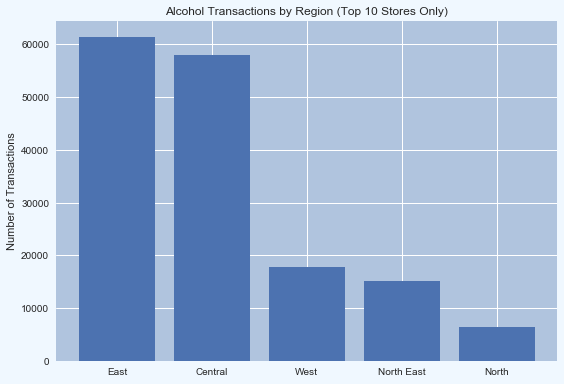

In [121]:
#We can see that the Eastern and Central regions of Iowa generate sales much higher than the rest of the regions
values = es['Location'].value_counts()
index = range(len(values))
fig, ax = plt.subplots()
ax.bar(index, values)
ax.set_xticks(index)
ax.set_xticklabels(['East','Central','West','North East','North'])
ax.set_title('Alcohol Transactions by Region (Top 10 Stores Only)')
ax.set_ylabel('Number of Transactions')
plt.tight_layout()
plt.show()



In [122]:
#Next, we want to see if Profit follows the same trend as above
gbp = es.groupby('Location')['Sale (Dollars)'].agg({'Total Sales':np.sum})
gbp.sort_values(by=('Total Sales'), ascending = False, inplace = True)
gbp

,Total Sales
Location,
Central,8861464.74
East,8829219.33
West,2549696.73
North East,1939965.30
North,698364.65


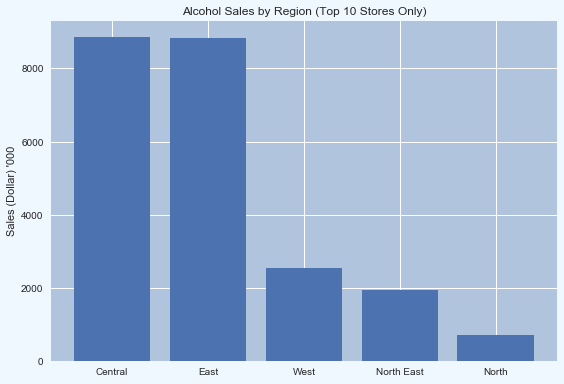

In [123]:
import matplotlib as mpl
values = gbp.values/1000
index = range(len(gbp))
fig, ax = plt.subplots()
ax.bar(index, values)
ax.set_xticks(index)
ax.set_xticklabels(['Central','East','West','North East','North'])
ax.set_title('Alcohol Sales by Region (Top 10 Stores Only)')
ax.set_ylabel('Sales (Dollar) \'000')
plt.tight_layout()
plt.show()
#Although the Eastern region had around 3.4K more transations, Central region had the highest total dollar-value sales
#, out-ranking East by around $30K. 

In [124]:
#Next, we want to calculate the percentages of each category sold per region to analyze preferences across Iowa

def catp(value):
    broad = ['WHISKY','OTHER','GIN','VODKA','RUM','LIQUEUR','TEQUILA','SCHNAPPS','CREME','BRANDY']
    locate = ['Central','East','West','North East','North']
    ldict = {}
    for i in locate:
        ldict[i] = {}
        catdict = {}
        for x in broad:
            catdict[x] = value[(value['Location'] == i) & (value['Broad Category'] == x)].shape[0]
        ldict[i] = catdict
        
    return ldict

counts = catp(es)
counts
#We create a dictionary within a dictionary to hold the number of transactions of each broad category in each region

{'Central': {'BRANDY': 3421,
  'CREME': 126,
  'GIN': 2347,
  'LIQUEUR': 6506,
  'OTHER': 2358,
  'RUM': 6796,
  'SCHNAPPS': 1840,
  'TEQUILA': 2938,
  'VODKA': 16529,
  'WHISKY': 15166},
 'East': {'BRANDY': 4111,
  'CREME': 165,
  'GIN': 2678,
  'LIQUEUR': 6404,
  'OTHER': 2610,
  'RUM': 7097,
  'SCHNAPPS': 2817,
  'TEQUILA': 2901,
  'VODKA': 17228,
  'WHISKY': 15351},
 'North': {'BRANDY': 277,
  'CREME': 25,
  'GIN': 207,
  'LIQUEUR': 791,
  'OTHER': 312,
  'RUM': 787,
  'SCHNAPPS': 377,
  'TEQUILA': 286,
  'VODKA': 1609,
  'WHISKY': 1777},
 'North East': {'BRANDY': 1418,
  'CREME': 34,
  'GIN': 762,
  'LIQUEUR': 1445,
  'OTHER': 561,
  'RUM': 1623,
  'SCHNAPPS': 800,
  'TEQUILA': 785,
  'VODKA': 3947,
  'WHISKY': 3727},
 'West': {'BRANDY': 953,
  'CREME': 29,
  'GIN': 530,
  'LIQUEUR': 2300,
  'OTHER': 733,
  'RUM': 2168,
  'SCHNAPPS': 957,
  'TEQUILA': 812,
  'VODKA': 4469,
  'WHISKY': 4798}}

In [125]:
#These are the total number of transactions per region
central_s = es[es['Location'] == 'Central'].shape[0]
print central_s
east_s = es[es['Location'] == 'East'].shape[0]
print east_s
north_s = es[es['Location'] == 'North'].shape[0]
print north_s
ne_s = es[es['Location'] == 'North East'].shape[0]
print ne_s
west_s = es[es['Location'] == 'West'].shape[0]
print west_s

58074
61412
6452
15120
17756


In [126]:
#We slightly change the function above to calculate the percentage of each category within its region
def percent(value):
    broad = ['WHISKY','OTHER','GIN','VODKA','RUM','LIQUEUR','TEQUILA','SCHNAPPS','CREME','BRANDY']
    locate = ['Central','East','West','North East','North']
    totals = [central_s,east_s,west_s,ne_s,north_s]
    ldict = {}
    for i in range(len(locate)):
        ldict[locate[i]] = {}
        catdict = {}
        for x in broad:
            catdict[x] = value[(value['Location'] == locate[i]) & (value['Broad Category'] == x)].shape[0]/float(totals[i])
        ldict[locate[i]] = catdict
        
    return ldict
perc = percent(es)
perc

{'Central': {'BRANDY': 0.058907600647449807,
  'CREME': 0.0021696456245479906,
  'GIN': 0.04041395460963598,
  'LIQUEUR': 0.11202947962943831,
  'OTHER': 0.040603368116540965,
  'RUM': 0.1170231084478424,
  'SCHNAPPS': 0.03168371388228811,
  'TEQUILA': 0.050590625753349175,
  'VODKA': 0.28461962323931533,
  'WHISKY': 0.26114956779281606},
 'East': {'BRANDY': 0.06694131440109424,
  'CREME': 0.0026867713150524326,
  'GIN': 0.04360711261642676,
  'LIQUEUR': 0.10427929394906534,
  'OTHER': 0.042499837165374844,
  'RUM': 0.11556373347228555,
  'SCHNAPPS': 0.045870513906076986,
  'TEQUILA': 0.04723832475737641,
  'VODKA': 0.2805314922165049,
  'WHISKY': 0.24996743307496905},
 'North': {'BRANDY': 0.042932424054556724,
  'CREME': 0.003874767513949163,
  'GIN': 0.03208307501549907,
  'LIQUEUR': 0.12259764414135152,
  'OTHER': 0.04835709857408556,
  'RUM': 0.12197768133911965,
  'SCHNAPPS': 0.05843149411035338,
  'TEQUILA': 0.04432734035957842,
  'VODKA': 0.24938003719776813,
  'WHISKY': 0.27541

In [127]:
percentdf = pd.DataFrame(perc)
percentdf

,Central,East,North,North East,West
BRANDY,0.06,0.07,0.04,0.09,0.05
CREME,0.00,0.00,0.00,0.00,0.00
GIN,0.04,0.04,0.03,0.05,0.03
LIQUEUR,0.11,0.10,0.12,0.10,0.13
OTHER,0.04,0.04,0.05,0.04,0.04
RUM,0.12,0.12,0.12,0.11,0.12
SCHNAPPS,0.03,0.05,0.06,0.05,0.05
TEQUILA,0.05,0.05,0.04,0.05,0.05
VODKA,0.28,0.28,0.25,0.26,0.25
WHISKY,0.26,0.25,0.28,0.25,0.27


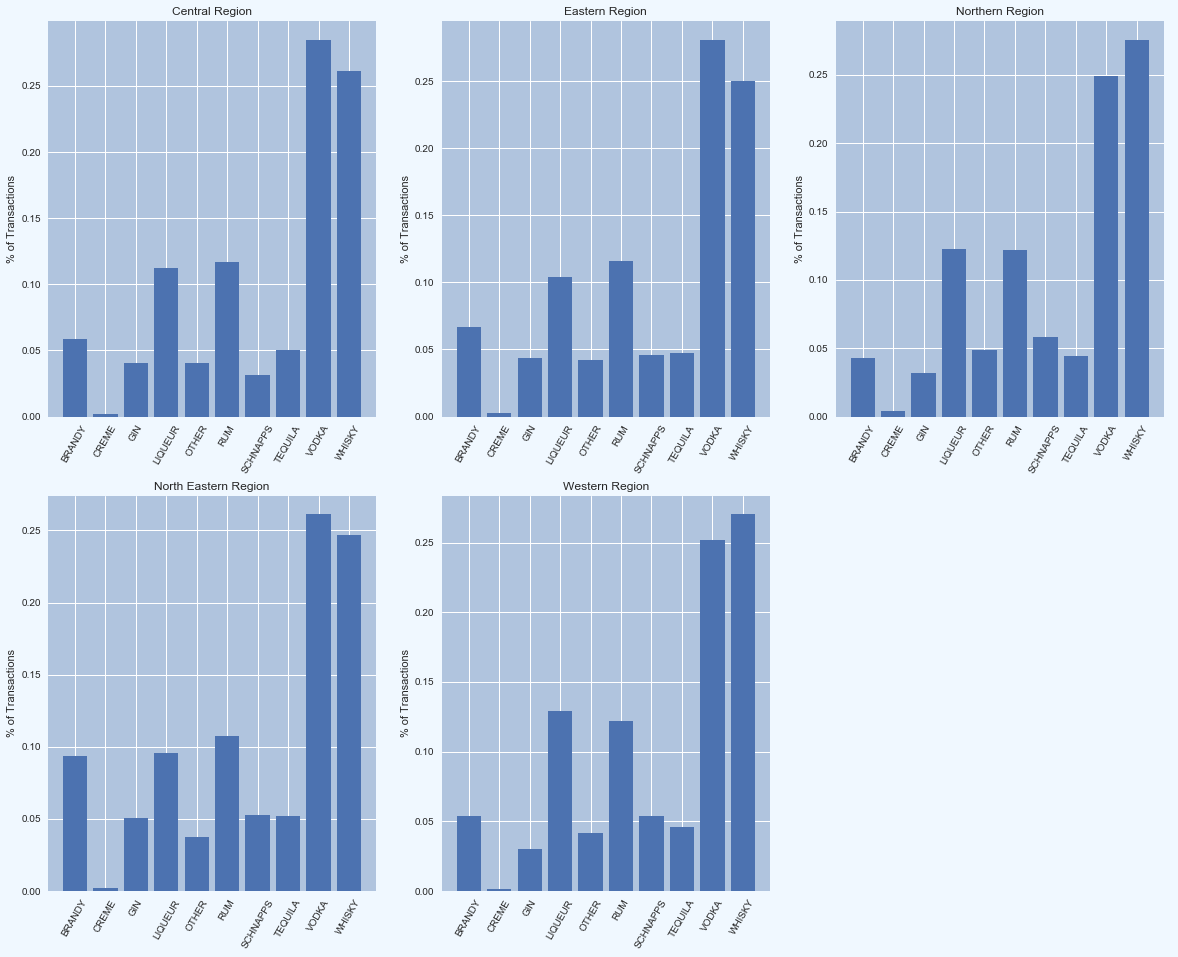

In [128]:

indexp = range(len(percentdf))
fig, ax = plt.subplots(2,3, figsize = (20,16))
ax[0,0].bar(indexp,percentdf['Central'])
ax[0,0].set_xticks(indexp)
ax[0,0].set_xticklabels(['BRANDY','CREME','GIN','LIQUEUR','OTHER','RUM','SCHNAPPS','TEQUILA','VODKA','WHISKY'], rotation = 60)
ax[0,0].set_ylabel('% of Transactions')
ax[0,0].set_title('Central Region')
ax[0,1].bar(indexp,percentdf['East'])
ax[0,1].set_xticks(indexp)
ax[0,1].set_xticklabels(['BRANDY','CREME','GIN','LIQUEUR','OTHER','RUM','SCHNAPPS','TEQUILA','VODKA','WHISKY'], rotation = 60)
ax[0,1].set_ylabel('% of Transactions')
ax[0,1].set_title('Eastern Region')
ax[0,2].bar(indexp,percentdf['North'])
ax[0,2].set_xticks(indexp)
ax[0,2].set_xticklabels(['BRANDY','CREME','GIN','LIQUEUR','OTHER','RUM','SCHNAPPS','TEQUILA','VODKA','WHISKY'], rotation = 60)
ax[0,2].set_ylabel('% of Transactions')
ax[0,2].set_title('Northern Region')
ax[1,0].bar(indexp,percentdf['North East'])
ax[1,0].set_xticks(indexp)
ax[1,0].set_xticklabels(['BRANDY','CREME','GIN','LIQUEUR','OTHER','RUM','SCHNAPPS','TEQUILA','VODKA','WHISKY'], rotation = 60)
ax[1,0].set_ylabel('% of Transactions')
ax[1,0].set_title('North Eastern Region')
ax[1,1].bar(indexp,percentdf['West'])
ax[1,1].set_xticks(indexp)
ax[1,1].set_xticklabels(['BRANDY','CREME','GIN','LIQUEUR','OTHER','RUM','SCHNAPPS','TEQUILA','VODKA','WHISKY'], rotation = 60)
ax[1,1].set_ylabel('% of Transactions')
ax[1,1].set_title('Western Region')
ax[1,2].axis('off')
plt.show()


***We can see that there is a clear pattern within all the regions. Vodka and Whiskey were the most popular, while Liqueurs and Rums were the next. The remaining categories made up similar proportions of the full amount of transactions. Although we identified different sales volumes and sales values between the different regions before, they all share similar preferences to alcohol, indicating that people may have similar preferences in alcohol across Iowa.***

----------------
